In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# About Dataset

Dataset of songs of various artist in the world and for each song is present:

Several statistics of the music version on spotify, including the number of streams;
Number of views of the official music video of the song on youtube.

## Content

It includes 26 variables for each of the songs collected from spotify. These variables are briefly described next:

- Track: name of the song, as visible on the Spotify platform.
- Artist: name of the artist.
- Url_spotify: the Url of the song.
- Album: the album in wich the song is contained on Spotify.
- Album_type: indicates if the song is relesead on Spotify as a single or contained in an album.
- Uri: a spotify link used to find the song through the API.
- Danceability: describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- Energy: is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
- Key: the key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
- Loudness: the overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
- Speechiness: detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- Acousticness: a confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- Instrumentalness: predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
- Liveness: detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- Valence: a measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- Tempo: the overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- Duration_ms: the duration of the track in milliseconds.
- Stream: number of streams of the song on Spotify.
- Url_youtube: url of the video linked to the song on Youtube, if it have any.
- Title: title of the videoclip on youtube.
- Channel: name of the channel that have published the video.
- Views: number of views.
- Likes: number of likes.
- Comments: number of comments.
- Description: description of the video on Youtube.
- Licensed: Indicates whether the video represents licensed content, which means that the content was uploaded to a channel linked to a YouTube content partner and then claimed by that partner.
- official_video: boolean value that indicates if the video found is the official video of the song.

# Cleaning Dataset

In [3]:
df = pd.read_csv('Spotify_Youtube.csv', index_col= 0)
df.head()

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20718 entries, 0 to 20717
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20718 non-null  object 
 1   Url_spotify       20718 non-null  object 
 2   Track             20718 non-null  object 
 3   Album             20718 non-null  object 
 4   Album_type        20718 non-null  object 
 5   Uri               20718 non-null  object 
 6   Danceability      20716 non-null  float64
 7   Energy            20716 non-null  float64
 8   Key               20716 non-null  float64
 9   Loudness          20716 non-null  float64
 10  Speechiness       20716 non-null  float64
 11  Acousticness      20716 non-null  float64
 12  Instrumentalness  20716 non-null  float64
 13  Liveness          20716 non-null  float64
 14  Valence           20716 non-null  float64
 15  Tempo             20716 non-null  float64
 16  Duration_ms       20716 non-null  float6

In [5]:
df.describe()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,2.071600e+04,2.024800e+04,2.017700e+04,2.014900e+04,2.014200e+04
mean,0.619777,0.635250,5.300348,-7.671680,0.096456,0.291535,0.055962,0.193521,0.529853,120.638340,2.247176e+05,9.393782e+07,6.633411e+05,2.751899e+04,1.359422e+08
std,0.165272,0.214147,3.576449,4.632749,0.111960,0.286299,0.193262,0.168531,0.245441,29.579018,1.247905e+05,2.746443e+08,1.789324e+06,1.932347e+05,2.441321e+08
min,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03
25%,0.518000,0.507000,2.000000,-8.858000,0.035700,0.045200,0.000000,0.094100,0.339000,97.002000,1.800095e+05,1.826002e+06,2.158100e+04,5.090000e+02,1.767486e+07
50%,0.637000,0.666000,5.000000,-6.536000,0.050500,0.193000,0.000002,0.125000,0.537000,119.965000,2.132845e+05,1.450110e+07,1.244810e+05,3.277000e+03,4.968298e+07
75%,0.740250,0.798000,8.000000,-4.931000,0.103000,0.477250,0.000463,0.237000,0.726250,139.935000,2.524430e+05,7.039975e+07,5.221480e+05,1.436000e+04,1.383581e+08
max,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


In [6]:
df.columns

Index(['Artist', 'Url_spotify', 'Track', 'Album', 'Album_type', 'Uri',
       'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [7]:
df.isnull().sum()

Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

In [8]:
df.corr()

C:\Users\wmigu\AppData\Local\Temp\ipykernel_13852\1886530979.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
Danceability,1.000000,0.236596,0.037735,0.353408,0.210376,-0.279435,-0.318611,-0.084482,0.465756,-0.065943,-0.089159,0.088546,0.099396,0.043940,0.073375
Energy,0.236596,1.000000,0.030160,0.744845,0.065319,-0.658304,-0.310058,0.173717,0.389158,0.157383,0.022660,0.067575,0.062824,0.044703,0.044239
Key,0.037735,0.030160,1.000000,0.025266,0.019778,-0.030818,0.000747,-0.011008,0.042559,0.001855,0.003186,0.007767,0.006751,0.007041,-0.006287
Loudness,0.353408,0.744845,0.025266,1.000000,0.033699,-0.547680,-0.545406,0.087062,0.311578,0.144766,0.012063,0.119244,0.124887,0.059626,0.118695
Speechiness,0.210376,0.065319,0.019778,0.033699,1.000000,-0.077598,-0.109895,0.085463,0.059204,0.037553,-0.051248,-0.013240,0.007495,0.008122,-0.016239
Acousticness,-0.279435,-0.658304,-0.030818,-0.547680,-0.077598,1.000000,0.274379,-0.040922,-0.200816,-0.129367,-0.028834,-0.071240,-0.078591,-0.052381,-0.104843
Instrumentalness,-0.318611,-0.310058,0.000747,-0.545406,-0.109895,0.274379,1.000000,-0.060021,-0.269785,-0.076734,-0.007284,-0.078405,-0.078427,-0.031468,-0.091942
Liveness,-0.084482,0.173717,-0.011008,0.087062,0.085463,-0.040922,-0.060021,1.000000,0.031904,0.006670,-0.004970,-0.015715,-0.022740,-0.013046,-0.039617
Valence,0.465756,0.389158,0.042559,0.311578,0.059204,-0.200816,-0.269785,0.031904,1.000000,0.090432,-0.052331,0.035423,0.011864,0.017381,-0.012109
Tempo,-0.065943,0.157383,0.001855,0.144766,0.037553,-0.129367,-0.076734,0.006670,0.090432,1.000000,-0.013660,0.000013,0.003680,0.008420,0.002504


### Drop innecessary columns

In [9]:
df = df.drop([ "Url_spotify", "Album_type", "Uri", "Url_youtube", "Title", "Channel", "Description", "Licensed", "official_video"], axis=1)
df.head()

,Artist,Track,Album,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,222640.0,693555221.0,6220896.0,169907.0,1.040235e+09
1,Gorillaz,Rhinestone Eyes,Plastic Beach,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,200173.0,72011645.0,1079128.0,31003.0,3.100837e+08
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,215150.0,8435055.0,282142.0,7399.0,6.306347e+07
3,Gorillaz,On Melancholy Hill,Plastic Beach,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,233867.0,211754952.0,1788577.0,55229.0,4.346636e+08
4,Gorillaz,Clint Eastwood,Gorillaz,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,340920.0,618480958.0,6197318.0,155930.0,6.172597e+08


In [10]:
df.corr()

C:\Users\wmigu\AppData\Local\Temp\ipykernel_13852\1886530979.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
Danceability,1.000000,0.236596,0.037735,0.353408,0.210376,-0.279435,-0.318611,-0.084482,0.465756,-0.065943,-0.089159,0.088546,0.099396,0.043940,0.073375
Energy,0.236596,1.000000,0.030160,0.744845,0.065319,-0.658304,-0.310058,0.173717,0.389158,0.157383,0.022660,0.067575,0.062824,0.044703,0.044239
Key,0.037735,0.030160,1.000000,0.025266,0.019778,-0.030818,0.000747,-0.011008,0.042559,0.001855,0.003186,0.007767,0.006751,0.007041,-0.006287
Loudness,0.353408,0.744845,0.025266,1.000000,0.033699,-0.547680,-0.545406,0.087062,0.311578,0.144766,0.012063,0.119244,0.124887,0.059626,0.118695
Speechiness,0.210376,0.065319,0.019778,0.033699,1.000000,-0.077598,-0.109895,0.085463,0.059204,0.037553,-0.051248,-0.013240,0.007495,0.008122,-0.016239
Acousticness,-0.279435,-0.658304,-0.030818,-0.547680,-0.077598,1.000000,0.274379,-0.040922,-0.200816,-0.129367,-0.028834,-0.071240,-0.078591,-0.052381,-0.104843
Instrumentalness,-0.318611,-0.310058,0.000747,-0.545406,-0.109895,0.274379,1.000000,-0.060021,-0.269785,-0.076734,-0.007284,-0.078405,-0.078427,-0.031468,-0.091942
Liveness,-0.084482,0.173717,-0.011008,0.087062,0.085463,-0.040922,-0.060021,1.000000,0.031904,0.006670,-0.004970,-0.015715,-0.022740,-0.013046,-0.039617
Valence,0.465756,0.389158,0.042559,0.311578,0.059204,-0.200816,-0.269785,0.031904,1.000000,0.090432,-0.052331,0.035423,0.011864,0.017381,-0.012109
Tempo,-0.065943,0.157383,0.001855,0.144766,0.037553,-0.129367,-0.076734,0.006670,0.090432,1.000000,-0.013660,0.000013,0.003680,0.008420,0.002504


C:\Users\wmigu\AppData\Local\Temp\ipykernel_13852\2695019891.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidths=.5, ax=ax)


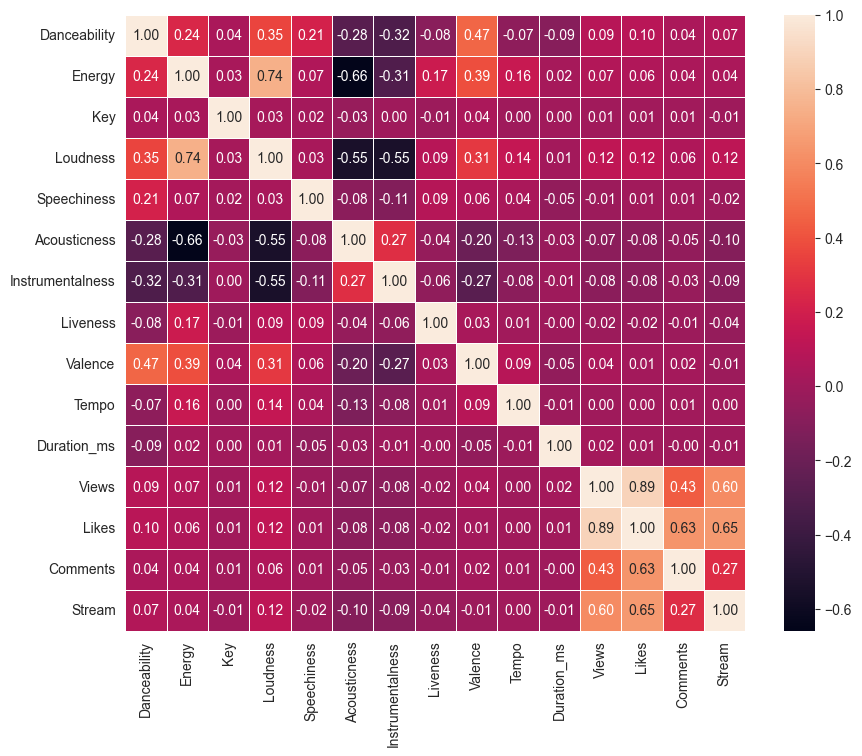

In [11]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidths=.5, ax=ax)
plt.show()

# EDA

In [12]:
df["Artist"].value_counts()

Gorillaz                  10
Die drei !!!              10
Hollywood Undead          10
Empire of the Sun         10
White Noise for Babies    10
                          ..
NewJeans                   6
Alfonso Herrera            6
Jimin                      3
Stars Music Chile          1
Bootie Brown               1
Name: Artist, Length: 2079, dtype: int64

In [13]:
df["Artist"] = df["Artist"].str.replace("$", "s")

C:\Users\wmigu\AppData\Local\Temp\ipykernel_13852\2379536517.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Artist"] = df["Artist"].str.replace("$", "s")


In [14]:
df.groupby("Artist").sum()["Views"] .sort_values(ascending=False).head(10)

C:\Users\wmigu\AppData\Local\Temp\ipykernel_13852\1266999885.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Artist").sum()["Views"] .sort_values(ascending=False).head(10)


Artist
Ed Sheeran                 1.546021e+10
CoComelon                  1.460167e+10
Katy Perry                 1.312063e+10
Charlie Puth               1.216759e+10
Luis Fonsi                 1.162811e+10
Justin Bieber              1.099106e+10
Daddy Yankee               1.087193e+10
Bruno Mars                 1.024092e+10
Macklemore & Ryan Lewis    1.012206e+10
Coldplay                   9.997278e+09
Name: Views, dtype: float64

C:\Users\wmigu\AppData\Local\Temp\ipykernel_13852\364223746.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  artist_views = df.groupby("Artist").sum()["Views"] .sort_values(ascending=False).head(10)


<AxesSubplot: xlabel='Artist', ylabel='Views'>

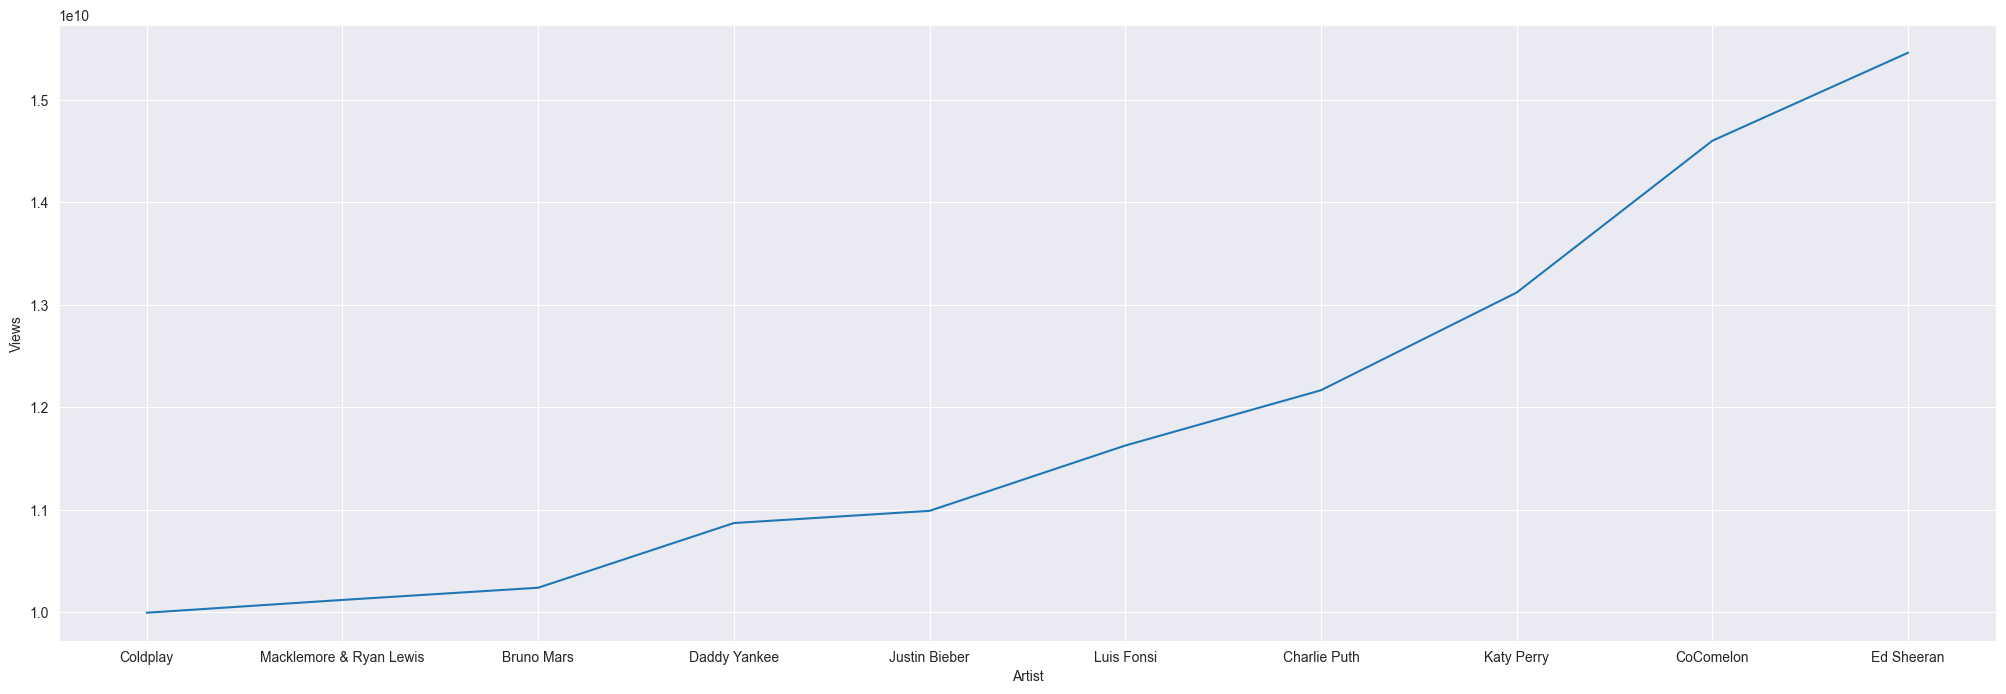

In [15]:
artist_views = df.groupby("Artist").sum()["Views"] .sort_values(ascending=False).head(10)
artist_views = artist_views.sort_values(ascending=True)
# artist_views.plot(kind="bar", figsize=(10, 8))
# plt.title("Artist with more views")
# plt.xlabel("Views")
# plt.ylabel("Artist")
# plt.show()

plt.figure(figsize=(25, 8))
sns.lineplot(artist_views)


In [16]:
df.groupby("Artist").sum()["Stream"] .sort_values(ascending=False).head(10)

C:\Users\wmigu\AppData\Local\Temp\ipykernel_13852\399304595.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Artist").sum()["Stream"] .sort_values(ascending=False).head(10)


Artist
Post Malone        1.525126e+10
Ed Sheeran         1.439488e+10
Dua Lipa           1.340808e+10
XXXTENTACION       1.322435e+10
The Weeknd         1.303197e+10
Justin Bieber      1.209777e+10
Imagine Dragons    1.185831e+10
Coldplay           1.177848e+10
Khalid             1.138684e+10
Bruno Mars         1.089786e+10
Name: Stream, dtype: float64

C:\Users\wmigu\AppData\Local\Temp\ipykernel_13852\746108852.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  artist_stream = df.groupby("Artist").sum()["Stream"] .sort_values(ascending=False).head(10)


<AxesSubplot: xlabel='Artist', ylabel='Stream'>

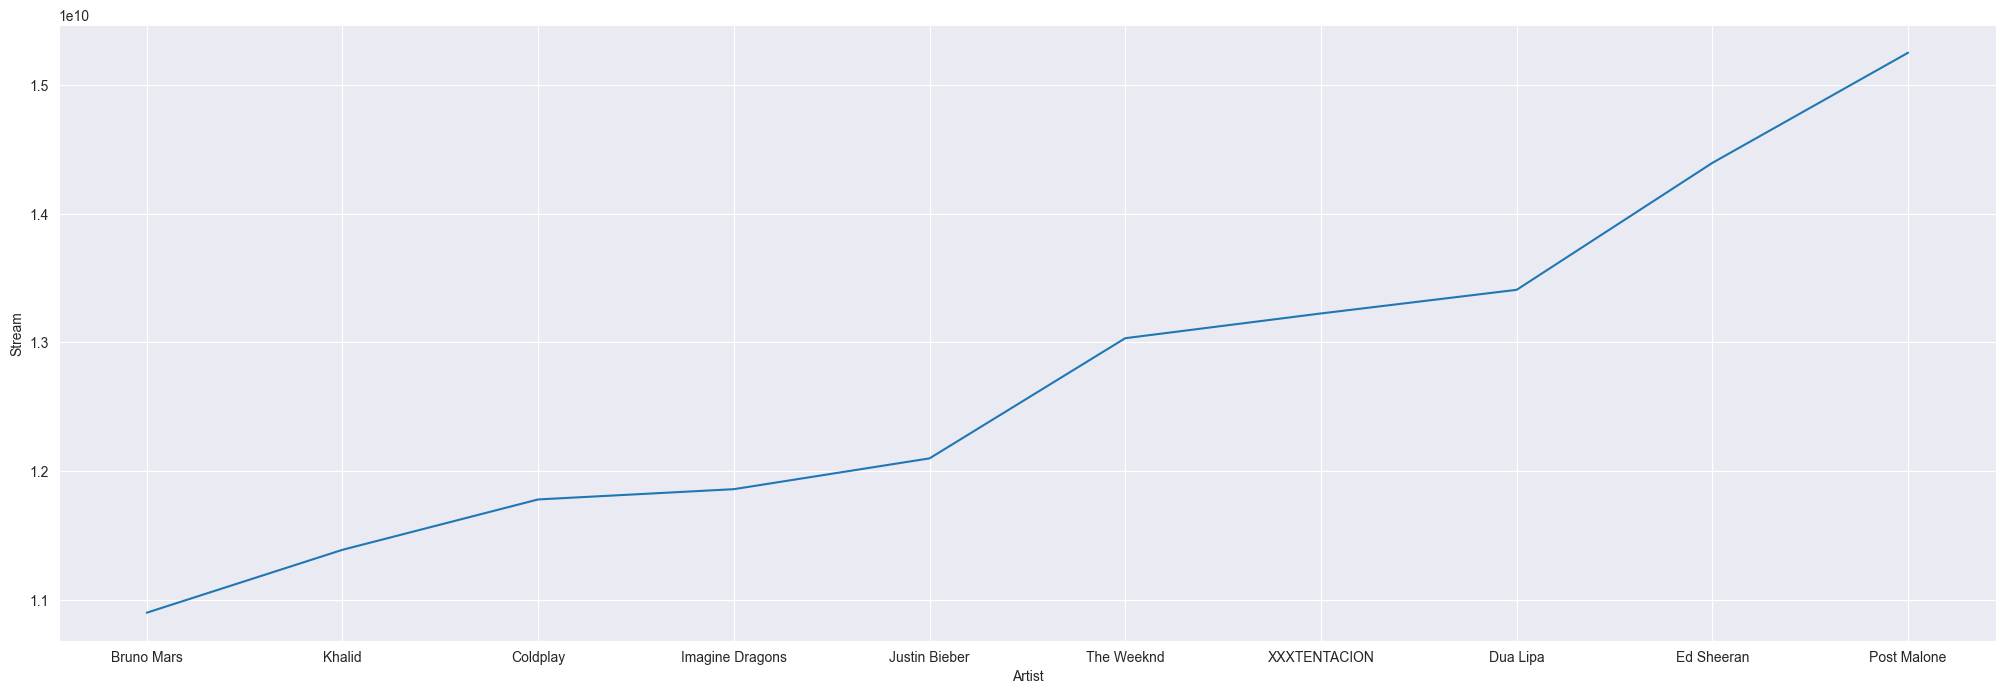

In [17]:
artist_stream = df.groupby("Artist").sum()["Stream"] .sort_values(ascending=False).head(10)
artist_stream = artist_stream.sort_values(ascending=True)

plt.figure(figsize=(25, 8))
sns.lineplot(artist_stream)

In [18]:
df[["Track","Artist","Views"]].sort_values(by = "Views", ascending=False).head(10)

,Track,Artist,Views
1147,Despacito,Luis Fonsi,8.079649e+09
365,Despacito,Daddy Yankee,8.079647e+09
12452,Shape of You,Ed Sheeran,5.908398e+09
14580,See You Again (feat. Charlie Puth),Charlie Puth,5.773798e+09
12469,See You Again (feat. Charlie Puth),Wiz Khalifa,5.773797e+09
20303,Wheels on the Bus,CoComelon,4.898831e+09
10686,Uptown Funk (feat. Bruno Mars),Mark Ronson,4.821016e+09
8937,Gangnam Style (강남스타일),PSY,4.679767e+09
9569,Sugar,Maroon 5,3.817733e+09
13032,Roar,Katy Perry,3.725749e+09


C:\Users\wmigu\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wmigu\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wmigu\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wmigu\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wmigu\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:

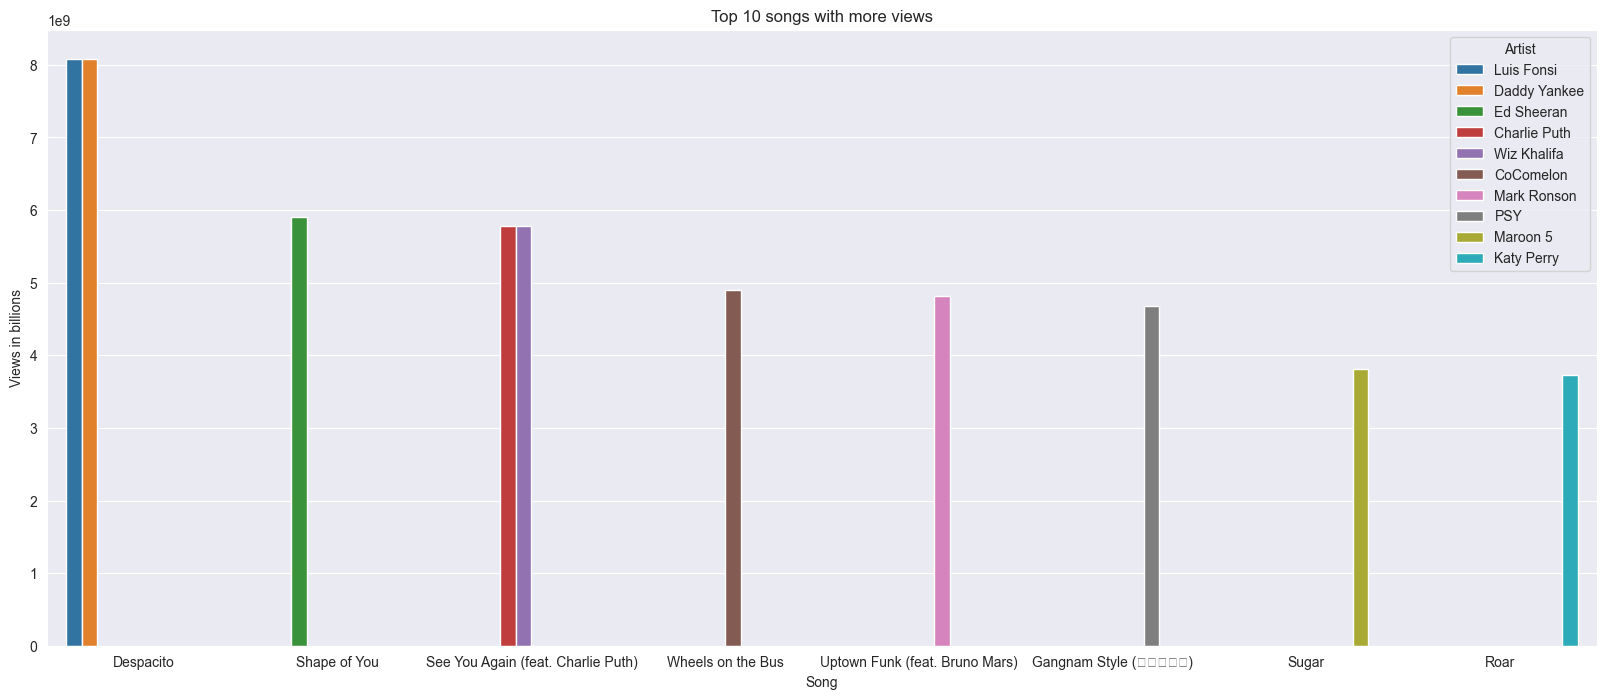

In [19]:
songs_views = df[["Track","Artist","Views"]].sort_values(by = "Views", ascending=False).head(10)
plt.figure(figsize=(20, 8))
sns.barplot(x="Track", y="Views", hue="Artist", data=songs_views)
plt.title("Top 10 songs with more views")
plt.xlabel("Song")
plt.ylabel("Views in billions")
plt.show()


In [20]:
df[["Track","Artist","Stream"]].sort_values(by = "Stream", ascending=False).head(10)

,Track,Artist,Stream
15250,Blinding Lights,The Weeknd,3.386520e+09
12452,Shape of You,Ed Sheeran,3.362005e+09
19186,Someone You Loved,Lewis Capaldi,2.634013e+09
17937,rockstar (feat. 21 Savage),Post Malone,2.594927e+09
17445,Sunflower - Spider-Man: Into the Spider-Verse,Swae Lee,2.538330e+09
17938,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,2.538330e+09
13503,One Dance,Drake,2.522432e+09
16099,Closer,The Chainsmokers,2.456205e+09
16028,Closer,Halsey,2.456205e+09
14030,Believer,Imagine Dragons,2.369272e+09


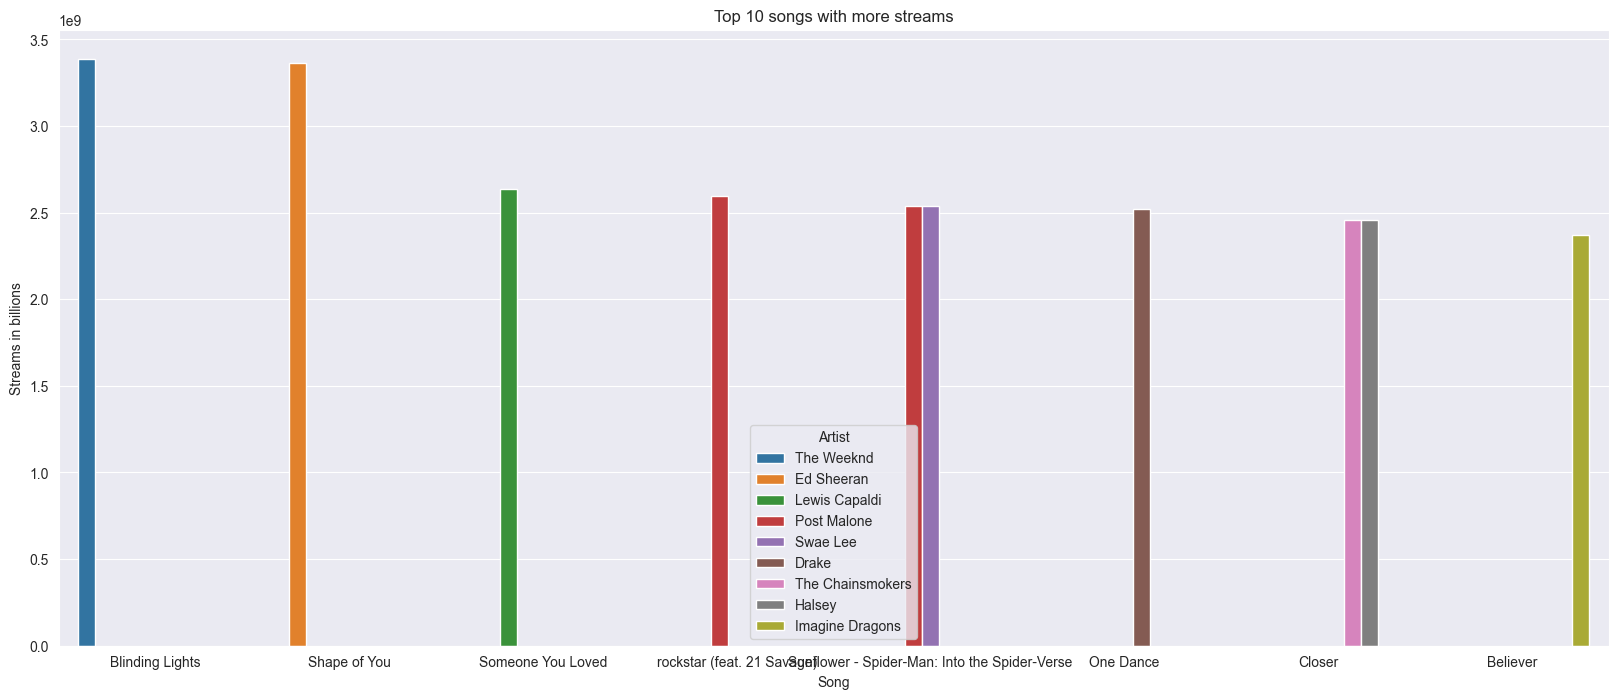

In [21]:
songs_stream = df[["Track","Artist","Stream"]].sort_values(by = "Stream", ascending=False).head(10)
plt.figure(figsize=(20, 8))
sns.barplot(x="Track", y="Stream", hue="Artist", data=songs_stream)
plt.title("Top 10 songs with more streams")
plt.xlabel("Song")
plt.ylabel("Streams in billions")
plt.show()


## Top Albums

In [22]:
df.groupby("Album").sum()["Views"] .sort_values(ascending=False).head(10)

C:\Users\wmigu\AppData\Local\Temp\ipykernel_13852\2637058568.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Album").sum()["Views"] .sort_values(ascending=False).head(10)


Album
VIDA                                  2.114088e+10
See You Again (feat. Charlie Puth)    1.154760e+10
The Heist                             1.124059e+10
Peace Is The Mission (Extended)       1.063446e+10
CoComelon Kids Hits, Vol. 1           1.051820e+10
÷ (Deluxe)                            9.666639e+09
PRISM                                 7.820546e+09
What Is Love? (Deluxe Edition)        7.378171e+09
MALA SANTA                            6.421337e+09
Purpose (Deluxe)                      5.846258e+09
Name: Views, dtype: float64

In [23]:
df["like_percent"] = df["Likes"]/df["Views"]
df["like_percent"] = df["like_percent"].apply(lambda x: round(x,3))
df2 = df[df["Views"] > 5000000]
df2.sort_values(by = "like_percent", ascending= False).head(10)[["Artist","Track", "Views","like_percent"]]

,Artist,Track,Views,like_percent
19970,j-hope,Blue Side (Outro),16504576.0,0.143
8098,RM,Still Life (with Anderson .Paak),14483104.0,0.112
19963,j-hope,Arson,42659733.0,0.095
19965,j-hope,MORE,63707847.0,0.094
18889,NCT DREAM,Life Is Still Going On,10972776.0,0.084
8097,RM,Wild Flower (with youjeen),46284905.0,0.081
19088,JIN,The Astronaut,62033344.0,0.081
20684,Jung Kook,Stay Alive (Prod. SUGA of BTS),26646938.0,0.080
9695,Megan Thee Stallion,Butter - Megan Thee Stallion Remix,69255155.0,0.079
12490,Taylor Swift,Lavender Haze,14004124.0,0.077


<AxesSubplot: title={'left': 'Song Length Distribution (seconds)'}, xlabel='seconds', ylabel='[]'>

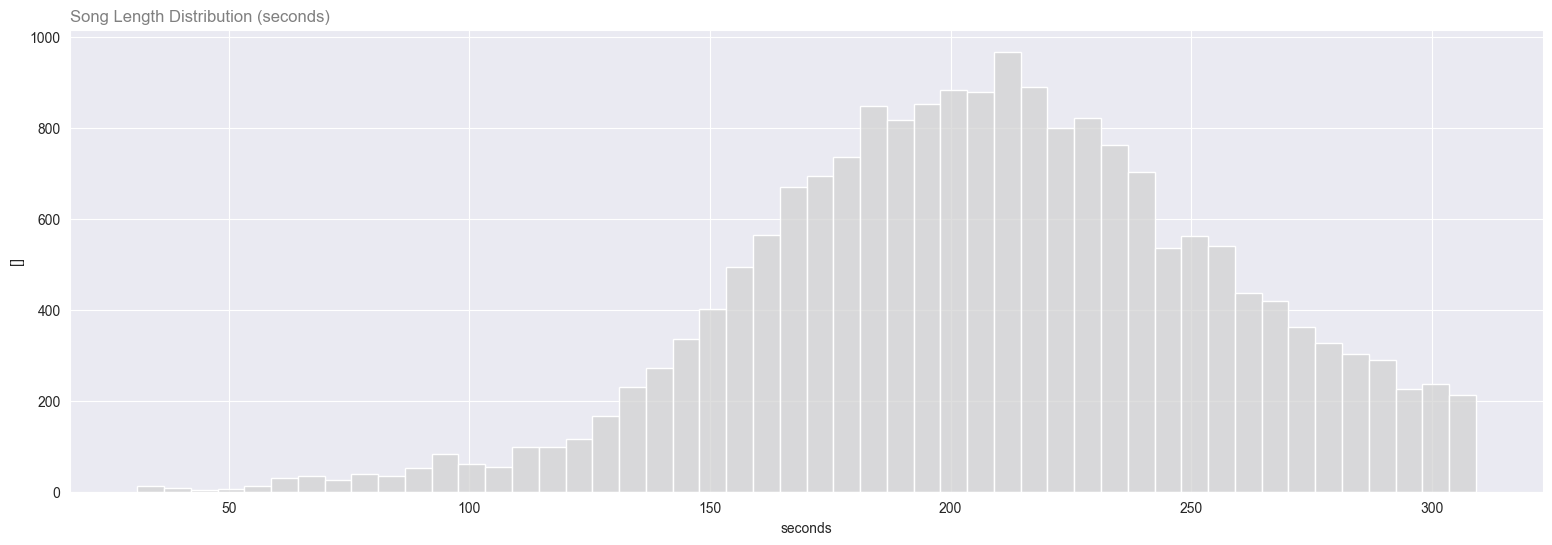

In [24]:
df["seconds"] = df["Duration_ms"].apply(lambda x: x/1000)
df3 = df['seconds'].sort_values(ascending = True).head(19000)
plt.figure(figsize=(19,6))
plt.title("Song Length Distribution (seconds)", loc = 'left', color = 'grey')
plt.ylabel([])
sns.histplot(df3, bins = 50, color = 'lightgrey')